# Dynamic Pricing

Let's take a look at dynamic pricing inspired by this [article](https://towardsdatascience.com/dynamic-pricing-with-multi-armed-bandit-learning-by-doing-3e4550ed02ac).

## Logistic function, increasing

In the mentioned article above, the demand curve, which is a plot of quantity/demand (y-axis) against price (x-axis), is slightly modified with the y-axis being the probability of buying an item and x-axis (staying the same) as price. The article uses the logistic function to model the modified demand curve, and its functional form is as follows

$P(B) = \dfrac{a}{1 + \exp^{bp}}$, where

- $P(B)$ is the probability of buying,
- $a$ is the upper bound (eg 1.0 for 100%), 
- $b$ is the growth rate (steepness) of the curve, and
- $p$ is the price.

Before we go on, let's look at the formal definition of the logistic function

$f(x) = \dfrac{L}{1 + \exp^{-k(x - x_0)}}$, where

- $L$ is the upperbound value for $f(x)$ (in our case, 1.0 for 100%),
- $x_0$ is the value of the function's midpoint (where the curve crosses the y-intercept), and
- $k$ is the growth rate of the curve.

These values, $L$, $x_0$ and $k$ are the parameters of the logistic function. Below, we plot plot differently parameterized logistic functions holding $x_0=0$ and with $x \in [-100, 100]$. You can clearly see that the logistic function is increasing, and not decreasing. We need to parameterize the logistic function to decrease since our demand curve is expected to decrease as price increase. Note that our `k` parameter values are all negative.

In [11]:
import numpy as np
import pandas as pd

def logistic(x, L=1.0, k=-1.0, x_0=0.0):
    return L / (1 + np.exp(k * (x - x_0)))

<Axes: title={'center': 'Logistic functions'}, xlabel='x'>

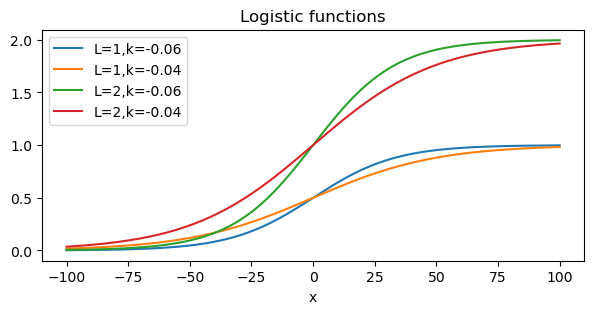

In [41]:
pd.DataFrame({
        'x': np.arange(-100, 101, 1)
    }) \
    .assign(**{
        'L=1,k=-0.06': lambda d: logistic(d['x'], k=-0.06),
        'L=1,k=-0.04': lambda d: logistic(d['x'], k=-0.04),
        'L=2,k=-0.06': lambda d: logistic(d['x'], L=2, k=-0.06),
        'L=2,k=-0.04': lambda d: logistic(d['x'], L=2, k=-0.04)
    }) \
    .set_index(['x']) \
    .plot(
        kind='line', 
        figsize=(7, 3.0), 
        title='Logistic functions'
    )

## Logistic function, decreasing

To get the logistic function to decrease, the `k` parameter values are set to positive values. The chart to the left below shows differently parameterized logistic functions holding $x_0=0$, with $x \in [-100, 100]$ and for $k > 0$. The chart to the right below is just a "zoomed in" view of the chart on the left, where $x \in [0, 100]$ (the article mentioned above does not explain this truncation).

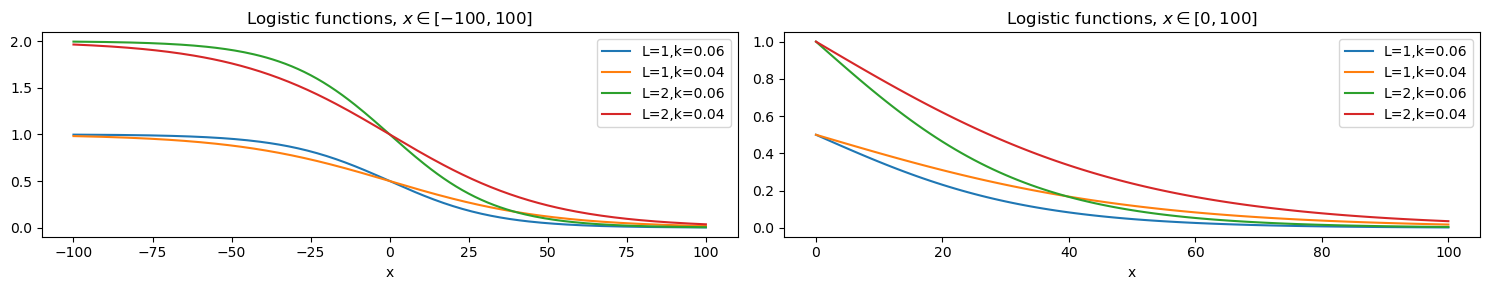

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 3))

pd.DataFrame({
        'x': np.arange(-100, 101, 1)
    }) \
    .assign(**{
        'L=1,k=0.06': lambda d: logistic(d['x'], k=0.06),
        'L=1,k=0.04': lambda d: logistic(d['x'], k=0.04),
        'L=2,k=0.06': lambda d: logistic(d['x'], L=2, k=0.06),
        'L=2,k=0.04': lambda d: logistic(d['x'], L=2, k=0.04)
    }) \
    .set_index(['x']) \
    .plot(
        kind='line', 
        title=r'Logistic functions, $x \in [-100, 100]$',
        ax=ax[0]
    )

pd.DataFrame({
        'x': np.arange(0, 101, 1)
    }) \
    .assign(**{
        'L=1,k=0.06': lambda d: logistic(d['x'], k=0.06),
        'L=1,k=0.04': lambda d: logistic(d['x'], k=0.04),
        'L=2,k=0.06': lambda d: logistic(d['x'], L=2, k=0.06),
        'L=2,k=0.04': lambda d: logistic(d['x'], L=2, k=0.04)
    }) \
    .set_index(['x']) \
    .plot(
        kind='line', 
        title=r'Logistic functions, $x \in [0, 100]$',
        ax=ax[1]
    )

fig.tight_layout()

## Revenue

If we know the parameters for the logistic function that is the model of our demand curve, then we can figure out the expected revenue, $r$, at any price point.

$r = \dfrac{ap}{1 + \exp^{bp}}$

Below, to the left, we plot the expected revenue with $x \in [-100, 100]$, but since price cannot be negative, again, we zoom in on the graph with $x \in [0, 100]$. For each of the curves in the bottom right, the highest point is the "optimal" price point. To figure out the optimal price point for these curves, we need to find the point on each curve whose tangent line has a slope of 0.

In [59]:
def revenue(x, L=1.0, k=-1.0, x_0=0.0):
    return (L * x) / (1 + np.exp(k * (x - x_0)))

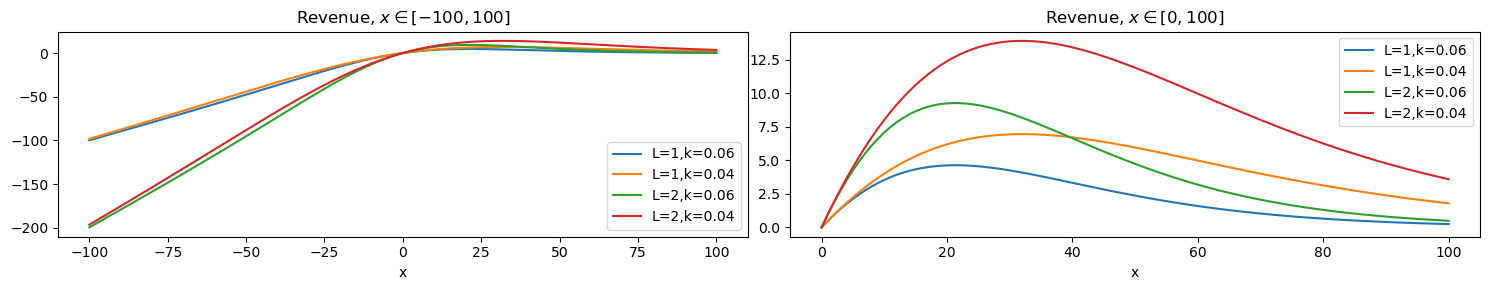

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))

pd.DataFrame({
        'x': np.arange(-100, 101, 1)
    }) \
    .assign(**{
        'L=1,k=0.06': lambda d: revenue(d['x'], k=0.06),
        'L=1,k=0.04': lambda d: revenue(d['x'], k=0.04),
        'L=2,k=0.06': lambda d: revenue(d['x'], L=2, k=0.06),
        'L=2,k=0.04': lambda d: revenue(d['x'], L=2, k=0.04)
    }) \
    .set_index(['x']) \
    .plot(
        kind='line', 
        title=r'Revenue, $x \in [-100, 100]$',
        ax=ax[0]
    )

pd.DataFrame({
        'x': np.arange(0, 101, 1)
    }) \
    .assign(**{
        'L=1,k=0.06': lambda d: revenue(d['x'], k=0.06),
        'L=1,k=0.04': lambda d: revenue(d['x'], k=0.04),
        'L=2,k=0.06': lambda d: revenue(d['x'], L=2, k=0.06),
        'L=2,k=0.04': lambda d: revenue(d['x'], L=2, k=0.04)
    }) \
    .set_index(['x']) \
    .plot(
        kind='line', 
        title=r'Revenue, $x \in [0, 100]$',
        ax=ax[1]
    )

fig.tight_layout()

## Exponential decay

Maybe another way to model the demand curve using probabilities is with exponential decay. The exponential decay function is

$N(t) = N_0 \exp^{-\lambda t}$, where

- $N(t)$ is the quantity at time $t$ (in our case, the probability of purchase),
- $N_0$ is the initial quantity,
- $\lambda$ is the rate of decay, and
- $t$ is the time (in our case, the price).

We hold $N_0=1.0$ and plot differently parameterized exponential decay functions below.

In [105]:
def exponential_decay(t, L, N_0=1.0):
    return N_0 * np.exp(L * t)

<Axes: xlabel='t'>

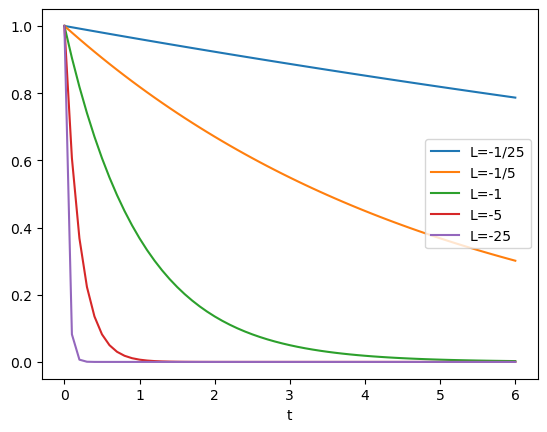

In [106]:
pd.DataFrame({'t': np.arange(0, 6.1, 0.1)}) \
    .assign(**{
        'L=-1/25': lambda d: exponential_decay(d['t'], L=-1/25),
        'L=-1/5': lambda d: exponential_decay(d['t'], L=-1/5),
        'L=-1': lambda d: exponential_decay(d['t'], L=-1),
        'L=-5': lambda d: exponential_decay(d['t'], L=-5),
        'L=-25': lambda d: exponential_decay(d['t'], L=-25)
    }) \
    .set_index(['t']) \
    .plot(kind='line')

## Load data

Let's load up some sales data from [Kaggle](https://www.kaggle.com/datasets/suddharshan/retail-price-optimization?datasetId=1865343). The data will be transforme as follows.

- p: is the price
- q: is the quantity bought at the price
- n: is the number of customers
- c: is the conversion $\dfrac{q}{n}$

In [137]:
from sklearn.preprocessing import MinMaxScaler

def get_mapping():
    scaler = MinMaxScaler(feature_range=(0, 5))

    df = pd.read_csv('./data/retail_price.csv') \
        .assign(p=lambda d: d['unit_price'])[['p']] \
        .drop_duplicates() \
        .assign(m=scaler.fit_transform(pd.read_csv('./data/retail_price.csv').assign(p=lambda d: d['unit_price'])[['p']].drop_duplicates())) \
        .sort_values(['p'])
    p2m = {r['p']: r['m'] for _, r in df.iterrows()}
    m2p = {v: k for k, v in p2m.items()}
    
    return p2m, m2p

p2m, m2p = get_mapping()

df = pd.read_csv('./data/retail_price.csv') \
    .assign(
        q=lambda d: d['qty'],
        p=lambda d: d['unit_price'],
        n=lambda d: d['customers']
    )[['q', 'p', 'n']] \
    .groupby(['p']) \
    [['q', 'n']].sum() \
    .reset_index() \
    .assign(
        p=lambda d: d['p'].map(p2m),
        c=lambda d: d['q'] / d['n']
    ) \
    .query('c < 1.0')

df

,p,q,n,c
0,0.000000,67,126,0.531746
1,0.001308,99,222,0.445946
2,0.011140,12,38,0.315789
3,0.023872,28,38,0.736842
4,0.050820,28,82,0.341463
...,...,...,...,...
275,4.752979,5,90,0.055556
276,4.779134,11,73,0.150685
277,4.795118,104,1106,0.094033
278,4.829265,10,159,0.062893


Below is a scatter plot of `c` vs `p`. As you can see, the relationship seems to be inversely related (as price goes up, the probability of conversion goes down). Let's try to use exponential decay to model the demand curve of this data.

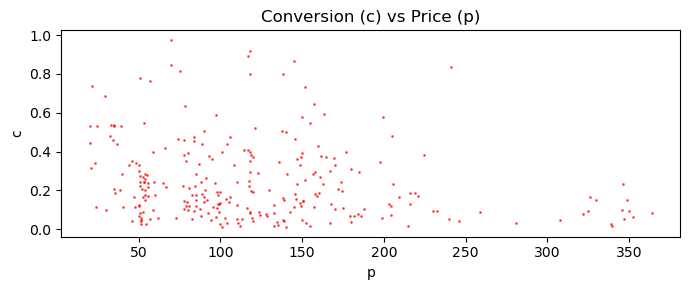

In [164]:
fig, ax = plt.subplots(figsize=(7, 3))

df \
    .assign(p=lambda d: d['p'].map(m2p)) \
    .plot(kind='scatter', x='p', y='c', ax=ax, s=1, alpha=0.6, color='red')

ax.set_title('Conversion (c) vs Price (p)')

fig.tight_layout()

## Curve fitting

We will try to find the optimal parameter `L` for an exponential decay function that fits this data. You can see that $L=-1.8$ is the optimal parameter value fitting an exponential decay model to this data.

In [140]:
from scipy.optimize import curve_fit

x = df['p']
y = df['c']

L_hat = y.max()
p_hat = [L_hat]

popt, pcov = curve_fit(exponential_decay, x, y, p_hat, method='dogbox')

In [141]:
popt

array([-1.80026534])

In [142]:
pcov

array([[0.01621172]])

Here is the exponential decay function plotted with the raw values.

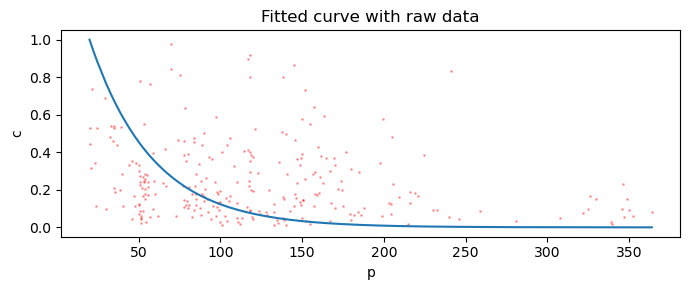

In [159]:
fig, ax = plt.subplots(figsize=(7, 3))

pd.DataFrame({'p': x, 'c': exponential_decay(x, popt[0])}) \
    .assign(p=lambda d: d['p'].map(m2p)) \
    .set_index(['p']) \
    .plot(kind='line', ax=ax)

df \
    .assign(p=lambda d: d['p'].map(m2p)) \
    .plot(kind='scatter', x='p', y='c', ax=ax, color='red', s=1, alpha=0.3)

ax.get_legend().remove()
ax.set_title('Fitted curve with raw data')

fig.tight_layout()

## Gradients

In a demand curve, the point elasticity, of a point $(p_i, q_i)$ on the demand curve, is computed using the price, quantity and slope of the tangent line to the point.

$E_p = \dfrac{\mathrm{d}q}{\mathrm{d}p} \times \dfrac{p_i}{q_i}$

Since we have fitted an exponential decay model to the data above, we can calculate the point elasticity at every point. 

- p: is the scaled price (scaled to the range $[0, 5]$),
- p': is the gradient at a price,
- m: is the original price,
- q: is the quantity,
- ped: is the pricing elasticity of demand (or just elasticity), and
- r: is the marginal revenue defined as $r = p \left( 1 + \dfrac{1}{E_d} \right)$.

In [232]:
import numdifftools as nd

pd.DataFrame({
    'p': x,
    "p'": np.diag(nd.Gradient(lambda t: exponential_decay(t=t, L=popt[0]))(x))
}) \
.assign(**{
    'm': lambda d: d['p'].map(m2p),
    'q': df['q'],
    'ped': lambda d: d["p'"] * (d['m'] / d['q']),
    "|p'|": lambda d: np.abs(d["p'"]),
    'r': lambda d: d['m'] * (1 + (1 / d['ped']))
})

,p,p',m,q,ped,|p'|,r
0,0.000000,-1.800265,19.900000,67,-0.534706,1.800265,-17.316736
1,0.001308,-1.796032,19.990000,99,-0.362653,1.796032,-35.131514
2,0.011140,-1.764520,20.666667,12,-3.038896,1.764520,13.865951
3,0.023872,-1.724537,21.542857,28,-1.326837,1.724537,5.306613
4,0.050820,-1.642871,23.397407,28,-1.372819,1.642871,6.354071
...,...,...,...,...,...,...,...
275,4.752979,-0.000346,347.000000,5,-0.024022,0.000346,-14098.334919
276,4.779134,-0.000330,348.800000,11,-0.010471,0.000330,-32963.115544
277,4.795118,-0.000321,349.900000,104,-0.001079,0.000321,-323793.409319
278,4.829265,-0.000302,352.250000,10,-0.010628,0.000302,-32791.483879


## Optimal price

We can sort the marginal revenue $r$ in descending order and observe the corresponding price $m$. The $m$ with the highest $r$ is the optimal price.

In [239]:
pd.DataFrame({
    'p': x,
    "p'": np.diag(nd.Gradient(lambda t: exponential_decay(t=t, L=popt[0]))(x))
}) \
.assign(**{
    'm': lambda d: d['p'].map(m2p),
    'q': df['q'],
    'ped': lambda d: d["p'"] * (d['m'] / d['q']),
    "|p'|": lambda d: np.abs(d["p'"]),
    'r': lambda d: d['m'] * (1 + (1 / d['ped']))
}) \
.sort_values(['r'], ascending=False) \
.head(5)

,p,p',m,q,ped,|p'|,r
224,2.137460,-0.038386,167.00,1,-6.410470,0.038386,140.948870
184,1.743679,-0.077992,139.90,1,-10.911058,0.077992,127.078146
252,2.834932,-0.010936,215.00,1,-2.351240,0.010936,123.558885
209,1.963092,-0.052541,155.00,2,-4.071963,0.052541,116.934825
176,1.672334,-0.088681,134.99,2,-5.985521,0.088681,112.437242


In [291]:
from scipy.optimize import fsolve
from scipy.stats import bernoulli

def thompson_sampling(arm_prices, successes, failures):
    samples = [np.random.beta(successes[i]+1, failures[i]+1) for i in range(len(prices))]
    samples = [s*arm_prices[i] for i, s in enumerate(samples)]
    return np.argmax(samples)

def run_simulation(prices, nstep):
    reactivity = nstep # worst case scenario initialization
    react_counter = 10 # number of steps needed to confirm that the reactivity threshold has been hit
    cum_regret = np.zeros((nstep,))
    avg_reward = 0
    arm_counter = np.zeros_like(prices, dtype=float)
    arm_avg_reward = np.zeros_like(prices, dtype=float)
    
    successes = np.zeros_like(prices, dtype=int)
    failures = np.zeros_like(prices, dtype=int) 
    
    for iteration in range(nstep):
        arm = thompson_sampling(prices, successes, failures)
        
        reward = get_reward(prices[arm])
        cum_regret[iteration] = cum_regret[iteration-1]+(optimal_price*optimal_probability - prices[arm]*reward)

        if reward > 0:
            successes[arm] += 1 
        else:
            failures[arm] += 1 

        arm_counter[arm] += 1
        reward *= prices[arm]    
        arm_avg_reward[arm] = ((arm_counter[arm] - 1) * arm_avg_reward[arm] + reward) / arm_counter[arm]  
        avg_reward = ((iteration) * avg_reward + reward) / (iteration+1) 

        if iteration > 100 and react_counter != 0 and avg_reward >= 0.95*optimal_price*optimal_probability:
            react_counter -= 1
            if react_counter == 0:
                reactivity = iteration+1 

    return cum_regret, reactivity, arm_counter

demand_curve = lambda t: exponential_decay(t=t, L=popt[0])
revenue_derivative = lambda x: nd.Gradient(lambda t: exponential_decay(t=t, L=popt[0]))([x]).item(0)
get_optimal_price = lambda L: fsolve(revenue_derivative, 0, args=(L))[0]
get_reward = lambda p: bernoulli.rvs(demand_curve(p))

In [293]:
optimal_price = fsolve(revenue_derivative, 0, maxfev=10_000)[0]
optimal_probability = demand_curve(optimal_price)
print(optimal_price)
print(optimal_probability)

411.73832009131087
1.24e-322


In [295]:
prices = df['p'].values
nstep = 100
nepoch = 10
regret_curves = {}

for strategy in ['thompson']:
    regret_curves[strategy] = np.zeros((nstep,)) 
    regrets = []
    reactivities = []
    arm_counters = np.zeros((len(prices),))
    for ep in range(nepoch):
        regret, reactivity, arm_counter = run_simulation(prices, nstep)
        regret_curves[strategy] += regret
        regrets.append(regret[-1])
        reactivities.append(reactivity)
        arm_counters += arm_counter/nstep
    regret_curves[strategy] /= nepoch
    arm_allocation = 100*arm_counters/nepoch
    print("-------------\nStrategy: %s" %strategy)    
    print("Regret -> mean: %.2f, median: %.2f, std: %.2f" %(np.mean(regrets), np.median(regrets), np.std(regrets)))
    print("Reactivity -> mean: %.2f, median: %.2f, std: %.2f" %(np.mean(reactivities), np.median(reactivities), np.std(reactivities)))
    print("Arm Allocation -> %s" %(arm_allocation))

-------------
Strategy: thompson
Regret -> mean: -0.53, median: 0.00, std: 1.06
Reactivity -> mean: 100.00, median: 100.00, std: 0.00
Arm Allocation -> [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 